# 🚫 WORK IN PROGRESS 🚫 Example of usage with price elasticity

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
    models_energy_cost_simple,
    models_operation_cost_top_down,
    models_cost_feedback,
)

import gemseo as gm

gm.configure_logger()

<RootLogger root (INFO)>

In [2]:
models_traffic.pop("rpk")

models_operation_cost_top_down.pop("passenger_aircraft_total_cost_and_airfare")


models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_simple": models_energy_cost_simple,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_cost_feedback": models_cost_feedback,
}

In [3]:
process = create_process(
    configuration_file="data_elasticity/config_elasticity.json",
    models=models,
)

## Set up variables

### Aviation scenario

In [4]:
process.parameters.price_elasticity = -0.5

In [5]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [6]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels
import numpy as np

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = np.array([0.0, 0.0, 0.0, 0.0])
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = np.array([0.0, 0.0, 0.0, 0.0])

In [9]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [71, 50, 0, 0]

In [10]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    500,
    500,
    500,
    500,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

### Sustainability assessment

In [11]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12.0
process.parameters.crops_biomass = 63.0
process.parameters.forest_residues_biomass = 17.0
process.parameters.agricultural_residues_biomass = 57.0
process.parameters.algae_biomass = 15.0
process.parameters.available_electricity = 200.0

In [12]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

In [13]:
from gemseo.algos.design_space import DesignSpace

# from gemseo import generate_n2_plot, create_scenario
#
process.setup()

max_rpk = 1e13
min_rpk = 1e1
size_rpk = 51
rpk_init_optim = np.linspace(min_rpk, max_rpk, num=size_rpk)

max_airfare = 0.9
min_airfare = 0.001
size_airfare = 51
airfare_init_optim = np.linspace(min_airfare, max_airfare, num=size_airfare)

design_space = DesignSpace()
design_space.add_variable(
    "rpk",
    size=size_rpk,
    lower_bound=np.full(size_rpk, min_rpk),
    upper_bound=np.full(size_rpk, max_rpk),
    value=rpk_init_optim,
)
design_space.add_variable(
    "airfare_per_rpk",
    size=size_airfare,
    lower_bound=np.full(size_airfare, min_airfare),
    upper_bound=np.full(size_airfare, max_airfare),
    value=airfare_init_optim,
)

# objective_name = "cumulative_total_airline_cost_discounted_obj"
objective_name = "airfare_per_rpk_real_obj"


process.gemseo_settings["design_space"] = design_space

process.gemseo_settings["objective_name"] = objective_name

process.gemseo_settings["scenario_type"] = "MDO"

process.gemseo_settings["formulation"] = "MDF"


# Create a GEMSEO scenario
process.create_gemseo_scenario()

# Add constraints
all_constraints = [
    # Consistency constraint for IDF
    "rpk_constraint_consistency",
    "airfare_per_rpk_real_constraint_consistency",
]


for constraint in all_constraints:
    process.scenario.add_constraint(constraint, constraint_type="eq")

process.scenario.set_differentiation_method("finite_differences")

# Configure the algorithm used
algo_options = {
    "ftol_rel": 0.001,
    "ftol_abs": 0.001,
    "normalize_design_space": True,
    "init_step": 1,
}
process.scenario.options = {"algo": "NLOPT_COBYLA", "max_iter": 500, "algo_options": algo_options}

# process.scenario.xdsmize(show_html=True)

 WARNING - 21:23:47: No coupling in MDA, switching chain_linearize to True.


In [14]:
process.setup()
process.mda_chain.normed_residual

0.0

In [15]:
process.compute()

    INFO - 21:23:47:  
    INFO - 21:23:47: *** Start MDOScenario execution ***
    INFO - 21:23:47: MDOScenario
    INFO - 21:23:47:    Disciplines: MDAChain
    INFO - 21:23:47:    MDO formulation: MDF
    INFO - 21:23:47: Optimization problem:
    INFO - 21:23:47:    minimize airfare_per_rpk_real_obj(rpk, airfare_per_rpk)
    INFO - 21:23:47:    with respect to airfare_per_rpk, rpk
    INFO - 21:23:47:    subject to constraints:
    INFO - 21:23:47:       rpk_constraint_consistency(rpk, airfare_per_rpk) == 0
    INFO - 21:23:47:       airfare_per_rpk_real_constraint_consistency(rpk, airfare_per_rpk) == 0
    INFO - 21:23:47: Solving optimization problem with algorithm NLOPT_COBYLA:


Pre-compute time: 0.008186101913452148 seconds
Normed residual: 0.0
Running MDO


    INFO - 21:31:33:    100%|██████████| 500/500 [07:46<00:00,  1.07 it/sec, obj=5.54]
 WARNING - 21:31:33: Optimization found no feasible point; the least infeasible point is selected.
    INFO - 21:31:33: Optimization result:
    INFO - 21:31:33:    Optimizer info:
    INFO - 21:31:33:       Status: None
    INFO - 21:31:33:       Message: Maximum number of iterations reached. GEMSEO stopped the driver.
    INFO - 21:31:33:       Number of calls to the objective function by the optimizer: 503
    INFO - 21:31:33:    Solution:
 WARNING - 21:31:33:       The solution is not feasible.
    INFO - 21:31:33:       Objective: 5.657694633541655
    INFO - 21:31:33:       Standardized constraints:
    INFO - 21:31:33:          airfare_per_rpk_real_constraint_consistency = [-1.45141838 -1.7051292  -2.6009105  -1.99430262 -2.78814924 -2.69013773
    INFO - 21:31:33:  -3.35237912 -3.73294524 -1.87353002 -2.77862666 -2.69019072 -1.92044996
    INFO - 21:31:33:  -2.18225353 -4.10278671 -1.95899162

Compute time: 466.76707696914673 seconds
Normed residual: 0.0
Post-compute time: 0.40957093238830566 seconds
Normed residual: 0.0


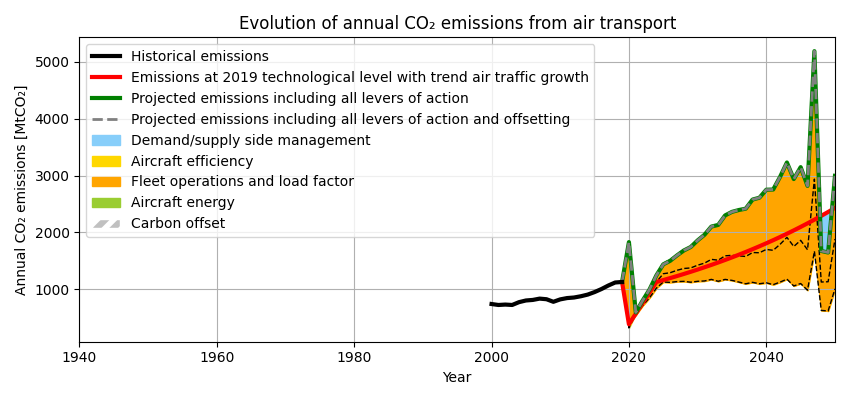

In [19]:
process.plot("air_transport_co2_emissions")

In [17]:
process.mda_chain.normed_residual

0.0

In [18]:
process.mda_chain.inner_mdas[0].normed_residual

IndexError: list index out of range

In [ ]:
process.mda_chain.residual_history

In [ ]:
rpk_with_elast = process.vector_outputs_df["rpk_long_range"]
rpk_no_elast = process.vector_outputs_df["rpk_long_range_no_elasticity"]

In [ ]:
process.vector_outputs_df["total_cost_per_rpk_without_extra_tax"]

In [ ]:
process.plot("airfare_per_rpk")